In [1]:
import random
import os
import networkx as nx
from tqdm import tqdm
import csv

In [79]:
# Define function to randomize the network
def randomize_network(G):
    randomized_G = G.copy()
    nx.double_edge_swap(randomized_G, nswap=2*randomized_G.number_of_edges(), max_tries=100*randomized_G.number_of_edges())
    return randomized_G

In [85]:
import numpy as np
import networkx as nx

def analyze_small_world(graph, num_random_graphs=5):
    """
    Determine whether a network is a small-world network.

    Parameters:
        graph (nx.Graph): The input graph.
        num_random_graphs (int): Number of random graphs to generate for average random properties.

    Returns:
        results (dict): Contains properties of the original and random networks, and whether it is small-world.
    """
    try:
        # Ensure the graph is connected
        if nx.is_directed(graph):
            graph = graph.to_undirected()
        if not nx.is_connected(graph):
            print(1)
            graph = graph.subgraph(max(nx.connected_components(graph), key=len)).copy()

        # Compute original graph properties
        avg_clustering = nx.average_clustering(graph)
        avg_shortest_path = nx.average_shortest_path_length(graph)

        # Initialize properties of random networks
        random_clustering = []
        random_shortest_path = []

        # Generate random networks and compute their properties
        for _ in range(num_random_graphs):
            random_graph = randomize_network(graph)
            if not nx.is_connected(random_graph):
                print(2)
            random_clustering.append(nx.average_clustering(random_graph))
            random_shortest_path.append(nx.average_shortest_path_length(random_graph))

        # Calculate average properties of random networks
        avg_random_clustering = np.mean(random_clustering)
        avg_random_shortest_path = np.mean(random_shortest_path)

        # Compare properties of the original and random networks
        lambda_ratio = avg_shortest_path / avg_random_shortest_path
        gamma_ratio = avg_clustering / avg_random_clustering

        # Determine if it is a small-world network
        is_small_world = lambda_ratio < 1.1 and gamma_ratio > 1.5

        # Return results
        results = {
            "Original Clustering Coefficient": avg_clustering,
            "Original Average Shortest Path": avg_shortest_path,
            "Random Clustering Coefficient": avg_random_clustering,
            "Random Average Shortest Path": avg_random_shortest_path,
            "Lambda (L/L_rand)": lambda_ratio,
            "Gamma (C/C_rand)": gamma_ratio,
            "Is Small World": is_small_world
        }

        return results

    except Exception as e:
        print(f"Error analyzing small-world properties: {e}")
        return {
            "Original Clustering Coefficient": None,
            "Original Average Shortest Path": None,
            "Random Clustering Coefficient": None,
            "Random Average Shortest Path": None,
            "Lambda (L/L_rand)": None,
            "Gamma (C/C_rand)": None,
            "Is Small World": False
        }


In [ ]:
import os
import networkx as nx
from tqdm import tqdm

# Directory containing GraphML files
directory = "slcc_2"
output_dir = "small_world_results_2"  # Directory to save individual CSV files

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process GraphML files
graphml_files = [f for f in os.listdir(directory) if f.endswith('.graphml')]

for file in tqdm(graphml_files, desc="Processing GraphML files"):
    file_path = os.path.join(directory, file)
    try:
        # Read the GraphML file
        graph = nx.read_graphml(file_path)

        # Analyze small-world properties
        results = analyze_small_world(graph)

        # Generate output file name
        output_file = os.path.join(output_dir, f"{os.path.splitext(file)[0]}_small_world.csv")

        # Save results to an individual CSV file
        with open(output_file, "w") as f:
            f.write("Original Clustering Coefficient,Original Average Shortest Path,Random Clustering Coefficient,Random Average Shortest Path,Lambda (L/L_rand),Gamma (C/C_rand),Is Small World\n")
            f.write(f"{results['Original Clustering Coefficient']},{results['Original Average Shortest Path']},"
                    f"{results['Random Clustering Coefficient']},{results['Random Average Shortest Path']},"
                    f"{results['Lambda (L/L_rand)']},{results['Gamma (C/C_rand)']},{results['Is Small World']}\n")

    except Exception as e:
        print(f"Error processing file {file}: {e}")


In [3]:
# Directory containing GraphML files
directory = "slcc_2"



# Process GraphML files
graphml_files = [f for f in os.listdir(directory) if f.endswith('.graphml')]

out_degree = []
in_degree = []

for file in tqdm(graphml_files, desc="Processing GraphML files"):
    file_path = os.path.join(directory, file)
    # Read the GraphML file
    graph = nx.read_graphml(file_path)

    node1 = "Garantex"
    node2 = "bc1qwxqxd25yk2dtw2ml04vxj9atq3huv4rdytf6vt"
    filtered_graph = graph.copy()
    if filtered_graph.has_edge(node1, node2):
        filtered_graph.remove_edge(node1, node2)
    if filtered_graph.has_edge(node2, node1):
        filtered_graph.remove_edge(node2, node1)

    node1_in_degree = filtered_graph.in_degree(node1)
    node2_in_degree = filtered_graph.in_degree(node2)
    node1_out_degree = filtered_graph.out_degree(node1)
    node2_out_degree = filtered_graph.out_degree(node2)

    total_in_degree = node1_in_degree + node2_in_degree
    total_out_degree = node1_out_degree + node2_out_degree
    out_degree.append(total_out_degree)
    in_degree.append(total_in_degree)

Processing GraphML files:   0%|          | 0/61 [00:00<?, ?it/s]

Processing GraphML files: 100%|██████████| 61/61 [00:11<00:00,  5.19it/s]


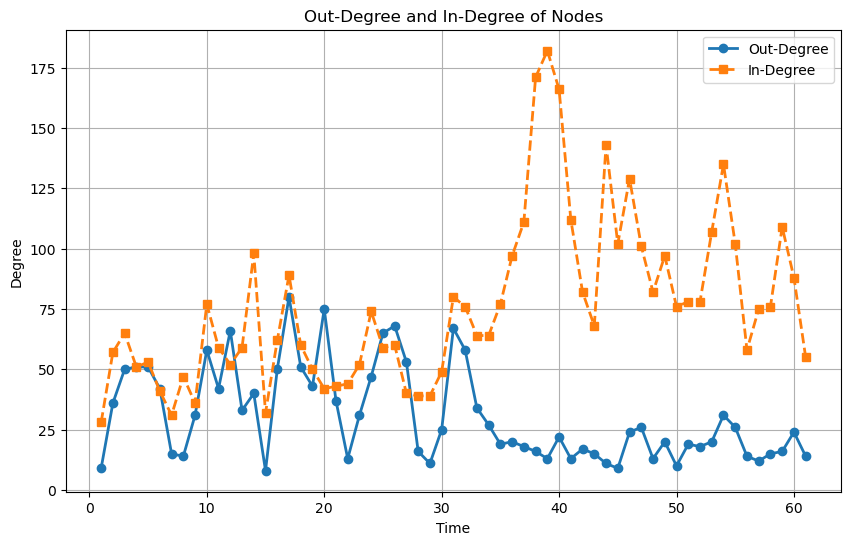

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(range(1,62), out_degree, label="Out-Degree", marker='o', linestyle='-', linewidth=2)

plt.plot(range(1,62), in_degree, label="In-Degree", marker='s', linestyle='--', linewidth=2)

plt.xlabel("Time")
plt.ylabel("Degree")
plt.title("Out-Degree and In-Degree of Nodes")
plt.legend()
plt.grid(True)
plt.savefig("Out-Degree and In-Degree of Nodes.jpg")
plt.show()

In [ ]:
directory = "slcc_2"
target_node = "Garantex" 

connected_addresses = list()

graphml_files = [f for f in os.listdir(directory) if f.endswith('.graphml')]
degree_assortativity_coefficient = []
for file in tqdm(graphml_files, desc="Processing GraphML files"):
    file_path = os.path.join(directory, file)
    graph = nx.read_graphml(file_path)
    print(nx.degree_assortativity_coefficient(graph))
    degree_assortativity_coefficient.append(nx.degree_assortativity_coefficient(graph))

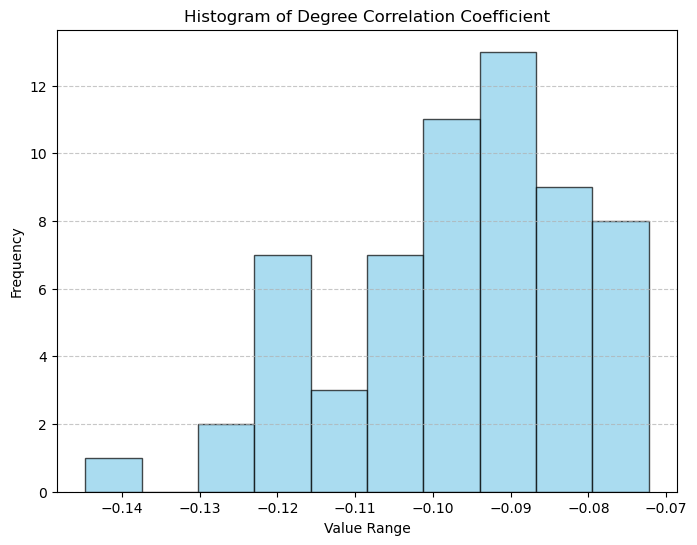

c:\Users\cyy20\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


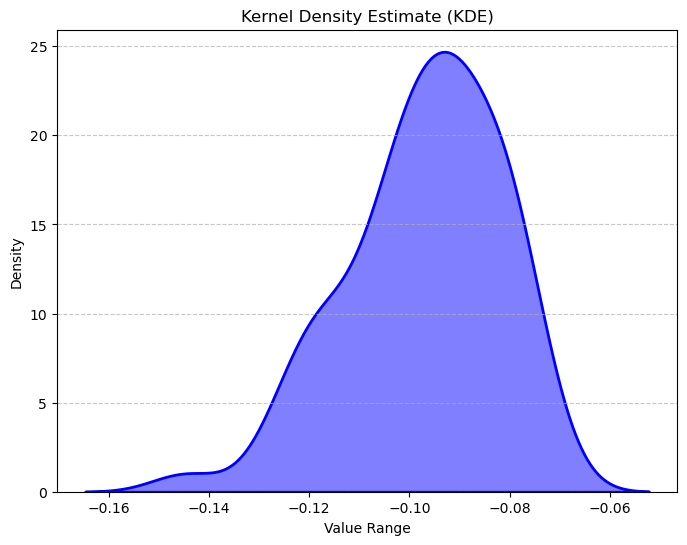

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(degree_assortativity_coefficient, bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.title("Histogram of Degree Correlation Coefficient")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Histogram of Degree Correlation Coefficient")
plt.show()

# 创建一个密度图
plt.figure(figsize=(8, 6))
sns.kdeplot(degree_assortativity_coefficient, color='blue', fill=True, alpha=0.5, linewidth=2)
plt.title("Kernel Density Estimate (KDE)")
plt.xlabel("Value Range")
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("KDE of Degree Correlation Coefficient")
plt.show()

In [10]:
import os
import networkx as nx
import matplotlib.pyplot as plt

def merge_nodes(graph, node1, node2, new_node):
    """
    Merge two nodes in a graph into a single node.

    Parameters:
        graph (nx.Graph): The input graph (can be directed or undirected).
        node1 (hashable): The first node to merge.
        node2 (hashable): The second node to merge.
        new_node (hashable): The name of the new node after merging.

    Returns:
        nx.Graph: The graph with the merged node.
    """
    if node1 not in graph or node2 not in graph:
        raise ValueError(f"One or both nodes ({node1}, {node2}) not found in the graph.")

    # Add the new node
    graph.add_node(new_node)

    # Transfer edges from node1 to the new node
    for neighbor in graph.neighbors(node1):
        if neighbor != new_node:  # Avoid self-loops
            graph.add_edge(new_node, neighbor, **graph[node1][neighbor])
    
    # Transfer edges from node2 to the new node
    for neighbor in graph.neighbors(node2):
        if neighbor != new_node:  # Avoid self-loops
            graph.add_edge(new_node, neighbor, **graph[node2][neighbor])
    
    # Copy attributes from node1 and node2 to the new node
    # (You can customize this step based on attribute merging logic)
    node1_attrs = graph.nodes[node1]
    node2_attrs = graph.nodes[node2]
    merged_attrs = {**node1_attrs, **node2_attrs}  # Combine attributes, with node2 overwriting conflicts
    nx.set_node_attributes(graph, {new_node: merged_attrs})

    # Remove the original nodes
    graph.remove_node(node1)
    graph.remove_node(node2)

    return graph

def read_graphs_from_directory(directory):
    """
    Read all GraphML files from a directory and return a list of graphs.
    
    Parameters:
        directory (str): Path to the directory containing GraphML files.
        
    Returns:
        list: List of NetworkX graph objects.
    """
    graphs = []
    graphml_files = [f for f in os.listdir(directory) if f.endswith('.graphml')]
    
    for file in graphml_files:
        file_path = os.path.join(directory, file)
        try:
            graph = nx.read_graphml(file_path)
            graph = merge_nodes(graph, "Garantex", "bc1qwxqxd25yk2dtw2ml04vxj9atq3huv4rdytf6vt", "Garantex")
            graphs.append((file, graph))  # Store both file name and graph
        except Exception as e:
            print(f"Error reading file {file}: {e}")
    
    return graphs


def compute_degree_distributions(graph):
    """
    Compute the out-degree, in-degree, and degree distributions of a graph.
    
    Parameters:
        graph (nx.Graph or nx.DiGraph): The input graph.
        
    Returns:
        tuple: (out_degree_distribution, in_degree_distribution, degree_distribution)
    """
    # Degree distribution
    degrees = [degree for _, degree in graph.degree()]
    degree_distribution = {k: degrees.count(k) for k in set(degrees)}

    if nx.is_directed(graph):
        # Out-degree distribution
        out_degrees = [out_degree for _, out_degree in graph.out_degree()]
        out_degree_distribution = {k: out_degrees.count(k) for k in set(out_degrees)}

        # In-degree distribution
        in_degrees = [in_degree for _, in_degree in graph.in_degree()]
        in_degree_distribution = {k: in_degrees.count(k) for k in set(in_degrees)}
    else:
        out_degree_distribution = None
        in_degree_distribution = None

    return out_degree_distribution, in_degree_distribution, degree_distribution


def plot_degree_distributions(graphs, target_node_id=None):
    """
    Plot out-degree, in-degree, and degree distributions for all graphs in the list.
    
    Parameters:
        graphs (list): List of (file name, graph) tuples.
        target_node_id (str): ID of the target node to highlight on the plot.
    """
    plt.figure(figsize=(12, 8))
    
    for file_name, graph in graphs:
        out_degree_distribution, in_degree_distribution, degree_distribution = compute_degree_distributions(graph)

        # Sort distributions for plotting
        degree_x, degree_y = zip(*sorted(degree_distribution.items()))
        plt.plot(degree_x, degree_y, label=f"{file_name} - Degree", marker='o')
        
        if in_degree_distribution:
            in_degree_x, in_degree_y = zip(*sorted(in_degree_distribution.items()))
            plt.plot(in_degree_x, in_degree_y, label=f"{file_name} - In-Degree", linestyle='--', marker='x')

        if out_degree_distribution:
            out_degree_x, out_degree_y = zip(*sorted(out_degree_distribution.items()))
            plt.plot(out_degree_x, out_degree_y, label=f"{file_name} - Out-Degree", linestyle='-.', marker='s')

        # Highlight the target node's degree
        if target_node_id and target_node_id in graph.nodes:
            target_degree = graph.degree(target_node_id)
            plt.scatter([target_degree], [degree_distribution.get(target_degree, 0)],
                        color='red', label=f"{file_name} - Target Degree ({target_node_id})", zorder=5)

            if in_degree_distribution:
                target_in_degree = graph.in_degree(target_node_id)
                plt.scatter([target_in_degree], [in_degree_distribution.get(target_in_degree, 0)],
                            color='purple', label=f"{file_name} - Target In-Degree ({target_node_id})", zorder=5)

            if out_degree_distribution:
                target_out_degree = graph.out_degree(target_node_id)
                plt.scatter([target_out_degree], [out_degree_distribution.get(target_out_degree, 0)],
                            color='green', label=f"{file_name} - Target Out-Degree ({target_node_id})", zorder=5)

    # Configure plot
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Degree / In-Degree / Out-Degree")
    plt.ylabel("Frequency")
    plt.title("Degree, In-Degree, and Out-Degree Distributions")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


New node 'Garantex2' successfully added.


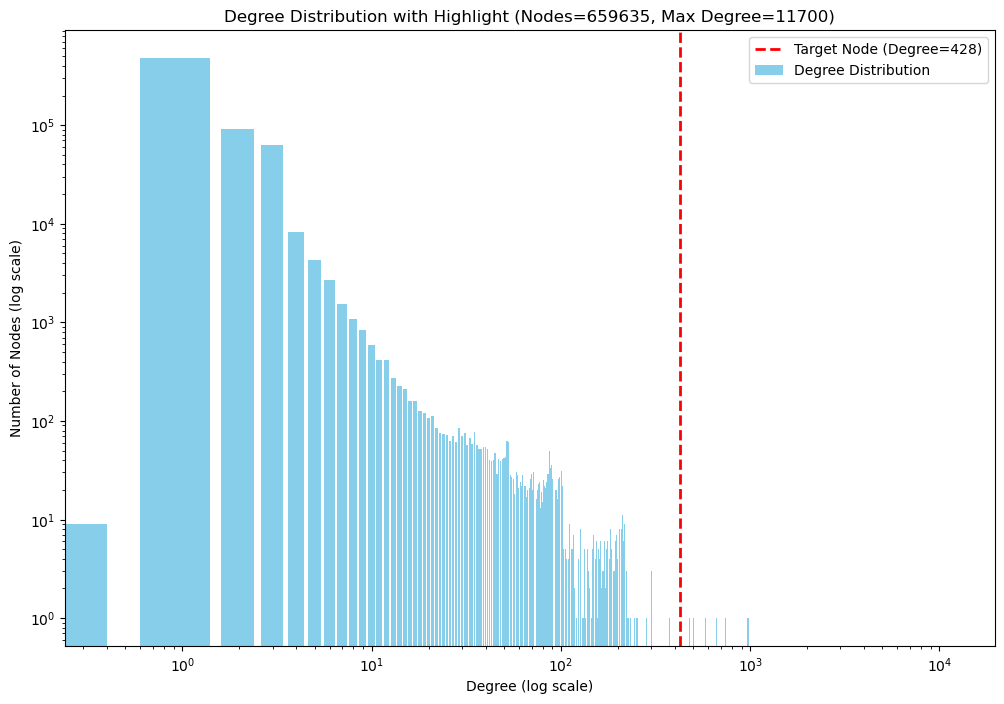

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

def merge_nodes(graph, node1, node2, new_node):
    """
    Merge two nodes into a single node in the graph.
    
    Parameters:
        graph (nx.Graph or nx.DiGraph): The graph in which nodes will be merged.
        node1 (str): ID of the first node to merge.
        node2 (str): ID of the second node to merge.
        new_node (str): ID of the new merged node.
    
    Returns:
        graph (nx.Graph or nx.DiGraph): The updated graph with merged nodes.
    """


    if node1 in graph and node2 in graph:
        # Add edges of node1 and node2 to the new node
        graph.add_node(new_node)

        for neighbor in set(graph.neighbors(node1)) | set(graph.neighbors(node2)):
            graph.add_edge(new_node, neighbor)
            graph.add_edge(neighbor, new_node)
        # Remove the old nodes
        graph.remove_node(node1)
        graph.remove_node(node2)
        
        # Confirm the new node is added
        if new_node in graph:
            print(f"New node '{new_node}' successfully added.")
        else:
            print(f"Error: New node '{new_node}' not found in the graph after merging.")
    else:
        print(f"Warning: One or both nodes {node1}, {node2} not found in the graph.")
    return graph

def plot_degree_distribution_with_highlight(graph, target_node_id, is_directed=False, output_path=None):
    """
    Plot the degree distribution of a graph and highlight the degree of a specific node.

    Parameters:
        graph (nx.Graph or nx.DiGraph): The graph to analyze.
        target_node_id (str): The ID of the target node to highlight.
        is_directed (bool): Whether the graph is directed.
        output_path (str): Path to save the plot. If None, plot is displayed.
    """
    if target_node_id not in graph:
        raise ValueError(f"Node {target_node_id} not found in the graph.")

    if is_directed:
        degree_distribution = [d for _, d in graph.out_degree()]
    else:
        degree_distribution = [d for _, d in graph.degree()]
    target_degree = graph.degree[target_node_id]

    degree_counts = {}
    for d in degree_distribution:
        degree_counts[d] = degree_counts.get(d, 0) + 1

    plt.figure(figsize=(12, 8))
    plt.bar(degree_counts.keys(), degree_counts.values(), color="skyblue", width=0.8, label="Degree Distribution")
    plt.axvline(target_degree, color='red', linestyle='--', linewidth=2, label=f"Target Node (Degree={target_degree})")
    plt.xscale("log")
    plt.yscale("log")

    total_nodes = len(graph.nodes())
    max_degree = max(degree_counts.keys())
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Number of Nodes (log scale)")
    plt.title(f"Degree Distribution with Highlight (Nodes={total_nodes}, Max Degree={max_degree})")
    plt.legend()

    plt.savefig("Degree Distribution with Highlight.jpg", dpi=300, bbox_inches='tight')

node1 = "Garantex"
node2 = "bc1qwxqxd25yk2dtw2ml04vxj9atq3huv4rdytf6vt"
merged_node = "Garantex2"
target_node_id = "Garantex2"

if __name__ == "__main__":

    graph = nx.read_graphml("./graphml_networks/network_2022-01-23.graphml")
    graph = merge_nodes(graph, node1, node2, merged_node)
    plot_degree_distribution_with_highlight(graph,target_node_id)


